In [2]:
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Loading Data

In [3]:
import pathlib
data_dir = "train"
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1156


In [ ]:
# import cv2 

# image = cv2.imread('Rutab001.jpg')

# print("The shape of the image is",image.shape)

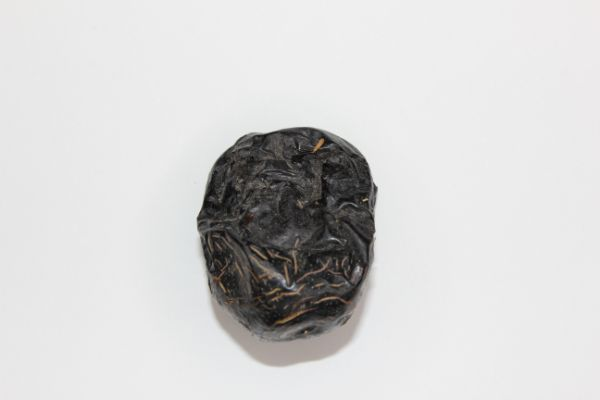

In [16]:
ajwa = list(data_dir.glob('ajwa/*'))
PIL.Image.open(str(ajwa[0]))


# Creating Data set

In [5]:
batch_size = 64
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=15,
  # image_size=(img_height, img_width),
  # batch_size=batch_size
  )

Found 1156 files belonging to 9 classes.
Using 925 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=15,
  # image_size=(img_height, img_width),
  # batch_size=batch_size
  )

Found 1156 files belonging to 9 classes.
Using 231 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Ajwa', 'Galaxy', 'Medjool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']


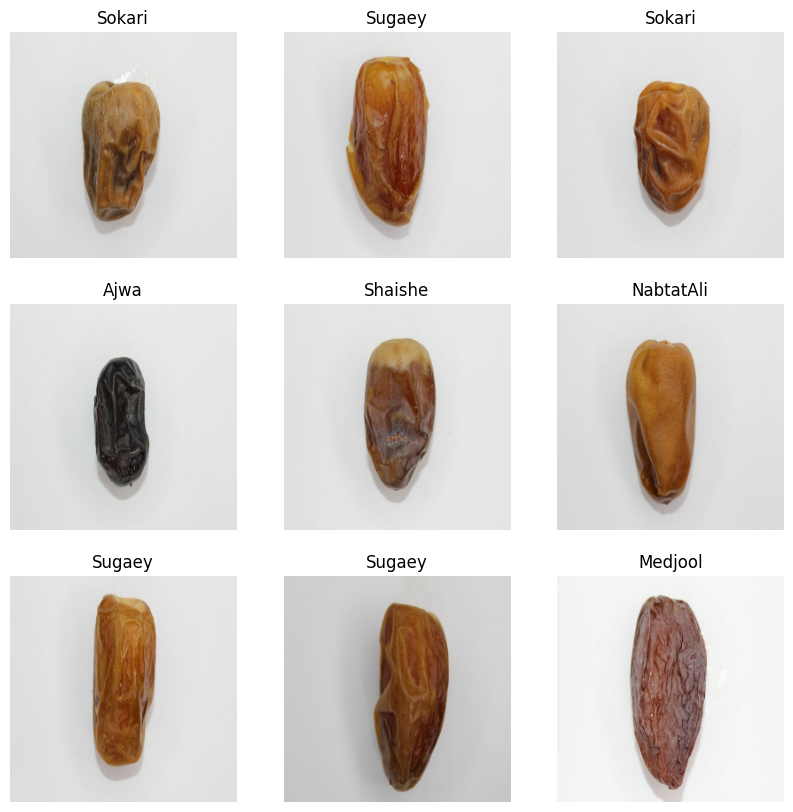

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Preprocessing

Found 1156 files belonging to 9 classes.
Using 925 files for training.


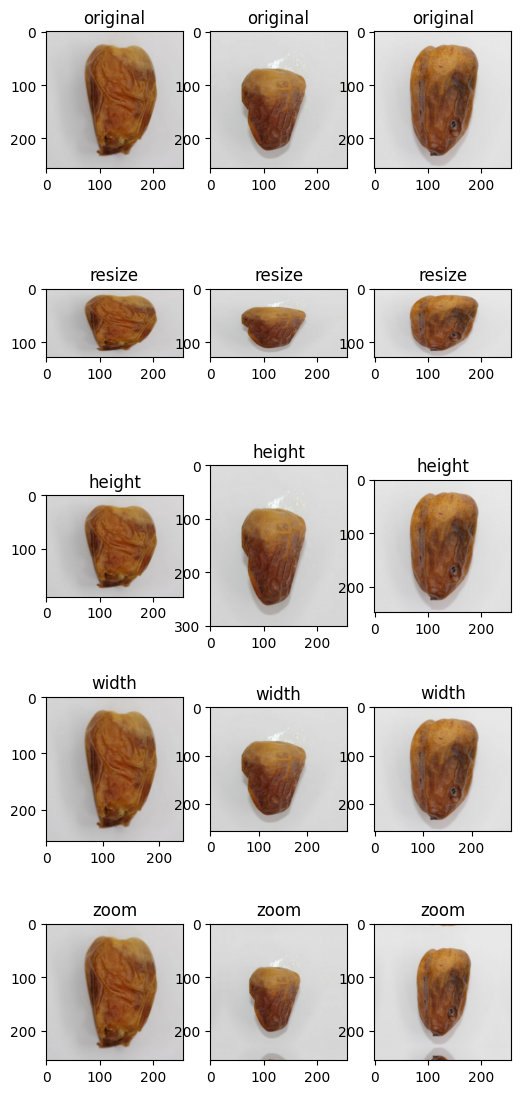

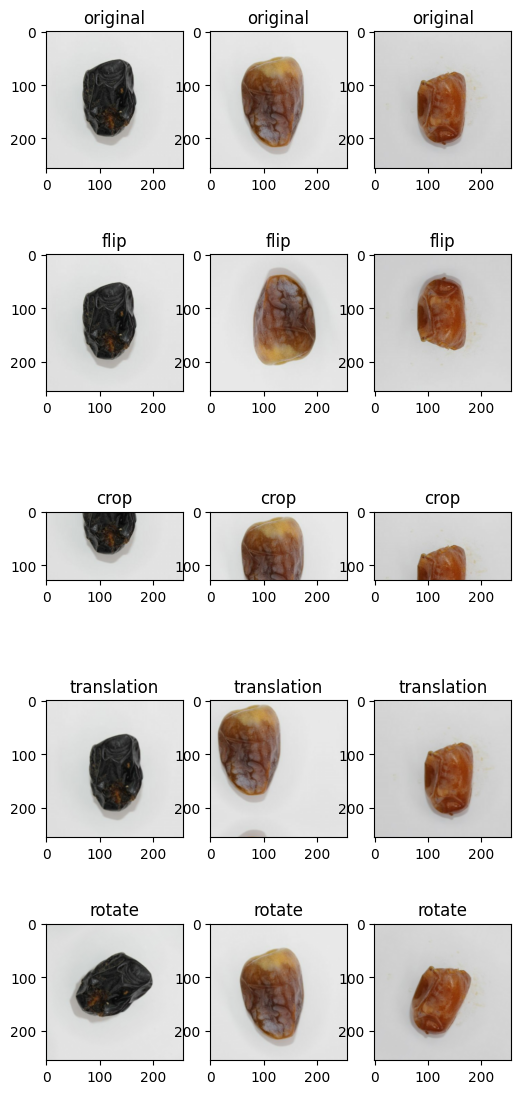

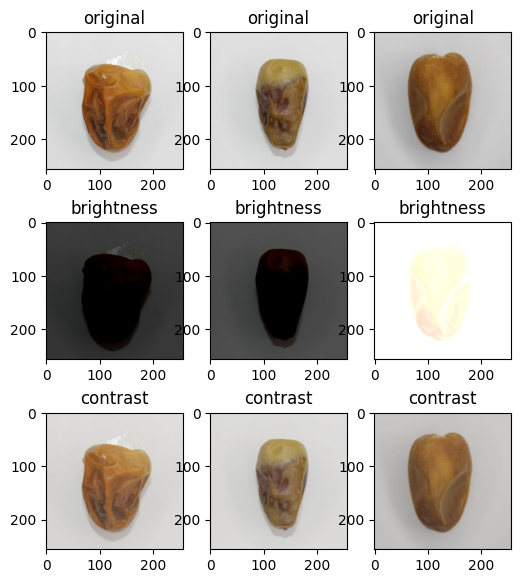

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import matplotlib.pyplot as plt
 
# use image_dataset_from_directory() to load images, with image size scaled to 256x256
PATH='train'  # modify to your path
ds = image_dataset_from_directory(PATH,
                                  validation_split=0.2, subset="training",
                                  image_size=(256,256), interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, shuffle=True, batch_size=32)
 
# Create preprocessing layers
out_height, out_width = 128,256
resize = tf.keras.layers.Resizing(out_height, out_width)
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)
 
flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")
rotate = tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(out_height, out_width)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
 
brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)
 
# Visualize images and augmentations
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for images, labels in ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # height
        ax[2][i].imshow(height(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("height")
        # width
        ax[3][i].imshow(width(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("width")
        # zoom
        ax[4][i].imshow(zoom(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("zoom")
plt.show()
 
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for images, labels in ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # flip
        ax[1][i].imshow(flip(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("flip")
        # crop
        ax[2][i].imshow(crop(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("crop")
        # translation
        ax[3][i].imshow(translation(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("translation")
        # rotate
        ax[4][i].imshow(rotate(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotate")
plt.show()
 
fig, ax = plt.subplots(3, 3, figsize=(6,7))
for images, labels in ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # brightness
        ax[1][i].imshow(brightness(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("brightness")
        # contrast
        ax[2][i].imshow(contrast(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("contrast")
plt.show()

Found 1156 files belonging to 9 classes.
Using 925 files for training.


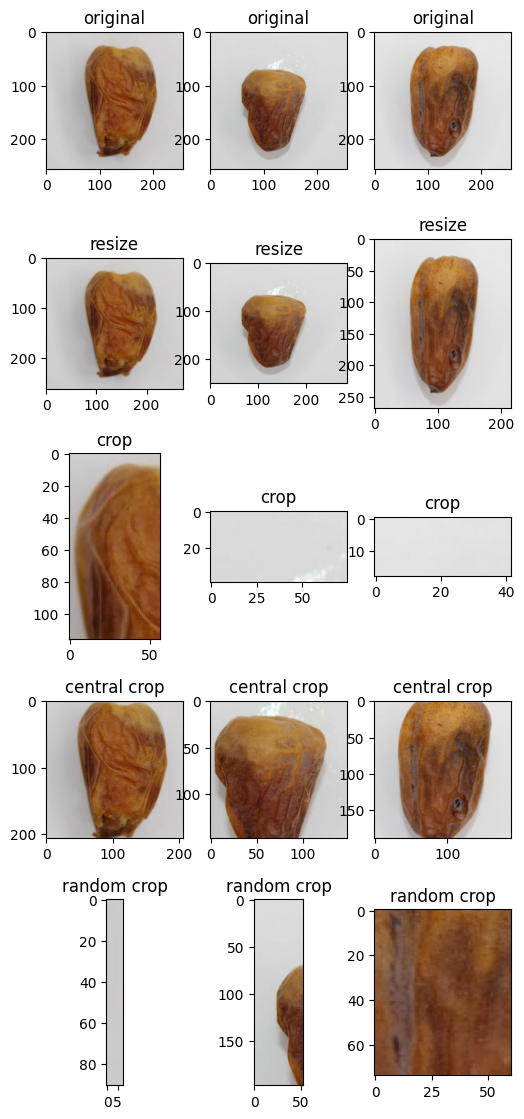

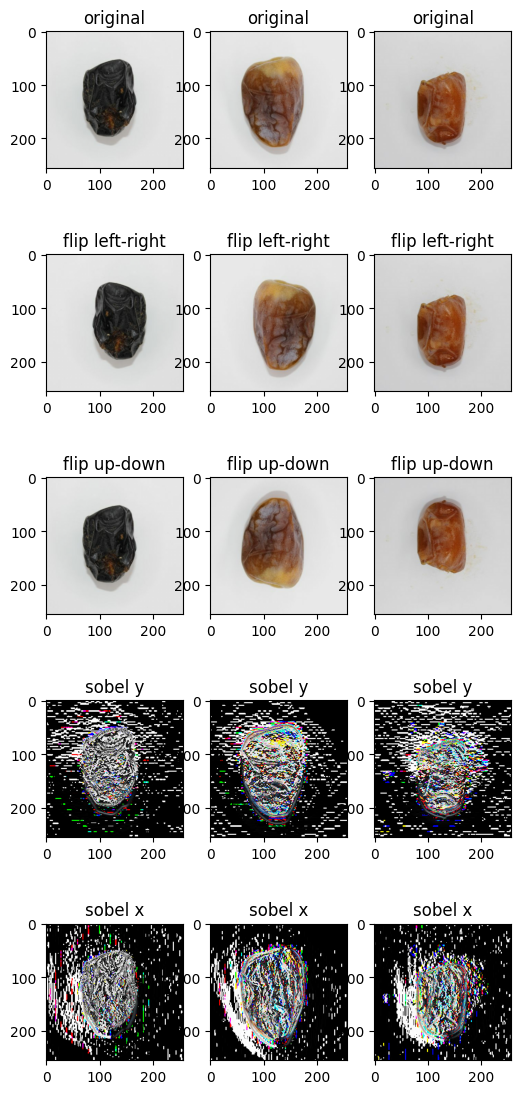

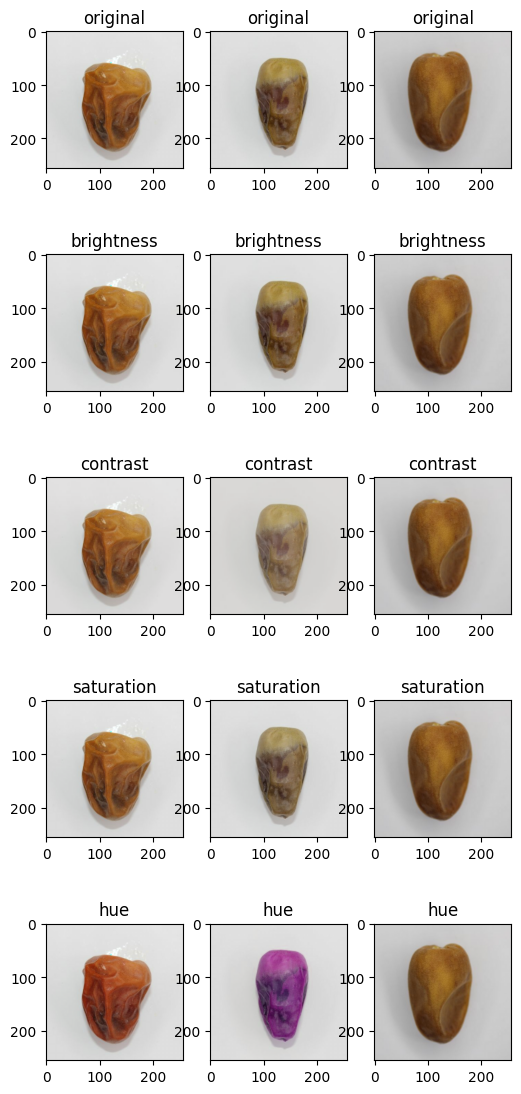

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import matplotlib.pyplot as plt
 
# use image_dataset_from_directory() to load images, with image size scaled to 256x256
PATH='train'  # modify to your path
ds = image_dataset_from_directory(PATH,
                                  validation_split=0.2, subset="training",
                                  image_size=(256,256), interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, shuffle=True, batch_size=32)
 
# Visualize tf.image augmentations
 
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for images, labels in ds.take(1):
    for i in range(3):
        # original
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        h = int(256 * tf.random.uniform([], minval=0.8, maxval=1.2))
        w = int(256 * tf.random.uniform([], minval=0.8, maxval=1.2))
        ax[1][i].imshow(tf.image.resize(images[i], [h,w]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # crop
        y, x, h, w = (128 * tf.random.uniform((4,))).numpy().astype("uint8")
        ax[2][i].imshow(tf.image.crop_to_bounding_box(images[i], y, x, h, w).numpy().astype("uint8"))
        ax[2][i].set_title("crop")
        # central crop
        x = tf.random.uniform([], minval=0.4, maxval=1.0)
        ax[3][i].imshow(tf.image.central_crop(images[i], x).numpy().astype("uint8"))
        ax[3][i].set_title("central crop")
        # crop to (h,w) at random offset
        h, w = (256 * tf.random.uniform((2,))).numpy().astype("uint8")
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[4][i].imshow(tf.image.stateless_random_crop(images[i], [h,w,3], seed).numpy().astype("uint8"))
        ax[4][i].set_title("random crop")
plt.show()
 
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for images, labels in ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # flip
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[1][i].imshow(tf.image.stateless_random_flip_left_right(images[i], seed).numpy().astype("uint8"))
        ax[1][i].set_title("flip left-right")
        # flip
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[2][i].imshow(tf.image.stateless_random_flip_up_down(images[i], seed).numpy().astype("uint8"))
        ax[2][i].set_title("flip up-down")
        # sobel edge
        sobel = tf.image.sobel_edges(images[i:i+1])
        ax[3][i].imshow(sobel[0, ..., 0].numpy().astype("uint8"))
        ax[3][i].set_title("sobel y")
        # sobel edge
        ax[4][i].imshow(sobel[0, ..., 1].numpy().astype("uint8"))
        ax[4][i].set_title("sobel x")
plt.show()
 
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for images, labels in ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # brightness
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[1][i].imshow(tf.image.stateless_random_brightness(images[i], 0.3, seed).numpy().astype("uint8"))
        ax[1][i].set_title("brightness")
        # contrast
        ax[2][i].imshow(tf.image.stateless_random_contrast(images[i], 0.7, 1.3, seed).numpy().astype("uint8"))
        ax[2][i].set_title("contrast")
        # saturation
        ax[3][i].imshow(tf.image.stateless_random_saturation(images[i], 0.7, 1.3, seed).numpy().astype("uint8"))
        ax[3][i].set_title("saturation")
        # hue
        ax[4][i].imshow(tf.image.stateless_random_hue(images[i], 0.3, seed).numpy().astype("uint8"))
        ax[4][i].set_title("hue")
plt.show()

# Data Augmentaion

Augment one class

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
import os
from PIL import Image


datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        vertical_flip = True,
        brightness_range = (0.5, 1.5))

class_name = "Ajwa"
image_directory = r'train/'+class_name+'/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
print(len(dataset))
x = np.array(dataset)
i = 0
count = 0 
for batch in datagen.flow(x, batch_size=200,
                          save_to_dir= r'augment_train/'+class_name+'/',
                          save_prefix='dr',
                          save_format='jpg'):
    count +=1
    print(count)    
    i += 1    
    if i > 3:        
        break

KeyboardInterrupt: 

~Augmentation for all classes~

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
import os
from PIL import Image


datagen = ImageDataGenerator(        
        rotation_range = 180,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

#class_names = train_ds.class_names

for cls_name in class_names:
    image_directory = r'train/'+str(cls_name)+'/'
    SIZE = 224
    dataset = []
    my_images = os.listdir(image_directory)
    for i, image_name in enumerate(my_images):    
        if (image_name.split('.')[1] == 'jpg'):        
            image = io.imread(image_directory + image_name)        
            image = Image.fromarray(image, 'RGB')        
            image = image.resize((SIZE,SIZE)) 
            dataset.append(np.array(image))
    x = np.array(dataset)
    i = 0
    for batch in datagen.flow(x, batch_size=200,
                            save_to_dir= r'augment_test',
                            save_prefix='dr',
                            save_format='jpg'):    
        i += 1    
        if i > 3:        
            break

# Neural Network Model

In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [19]:
epochs=11
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
29/29 [==============================] - 19s 658ms/step - loss: 0.2558 - accuracy: 0.9049 - val_loss: 0.3847 - val_accuracy: 0.8874
Epoch 2/10
29/29 [==============================] - 19s 658ms/step - loss: 0.1835 - accuracy: 0.9427 - val_loss: 0.4365 - val_accuracy: 0.8615
Epoch 3/10
29/29 [==============================] - 19s 646ms/step - loss: 0.1619 - accuracy: 0.9578 - val_loss: 0.4484 - val_accuracy: 0.8658
Epoch 4/10
29/29 [==============================] - 19s 657ms/step - loss: 0.1931 - accuracy: 0.9438 - val_loss: 0.4958 - val_accuracy: 0.8398
Epoch 5/10
29/29 [==============================] - 19s 655ms/step - loss: 0.3889 - accuracy: 0.8616 - val_loss: 0.4478 - val_accuracy: 0.8831
Epoch 6/10
29/29 [==============================] - 19s 656ms/step - loss: 0.1561 - accuracy: 0.9503 - val_loss: 0.4446 - val_accuracy: 0.8831
Epoch 7/10
29/29 [==============================] - 20s 671ms/step - loss: 0.1608 - accuracy: 0.9362 - val_loss: 0.4868 - val_accuracy: 0.8485

In [ ]:
###################OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOLD###

import tensorflow as tf
import matplotlib.pyplot as plt
 
# use image_dataset_from_directory() to load images, with image size scaled to 256x256
# PATH='train'  # modify to your path
# ds = image_dataset_from_directory(PATH,
#                                   validation_split=0.2, subset="training",
#                                   image_size=(256,256), interpolation="mitchellcubic",
#                                   crop_to_aspect_ratio=True,
#                                   seed=42, shuffle=True, batch_size=32)
 
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
 
# num_classes = 5
# model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1/127.0, offset=-1),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])
 
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
  
# model.fit(ds, epochs=3)

# Saving/loading model

In [62]:
model_dropout.save(pathlib.Path("old_model"))
# tf.saved_model.save(model_dropout, pathlib.Path("old_model"))

INFO:tensorflow:Assets written to: old_model\assets


INFO:tensorflow:Assets written to: old_model\assets


In [63]:
old_model = tf.saved_model.load(pathlib.Path("old_model"))

# Testing

In [58]:
test_dir = pathlib.Path("test")

test_image_count = len(list(test_dir.glob('*/*.jpg')))
print(test_image_count)

#ajwa_test = list(test_dir.glob('ajwa/*'))
#PIL.Image.open(str(ajwa_test[0]))



502


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


In [57]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  # image_size=(img_height, img_width),
  # batch_size=batch_size
  )

Found 502 files belonging to 9 classes.


getting labels & predicteds

In [ ]:
y_test = []
y_pred_array = []
for images, labels in test_ds.take(test_ds.__len__()):
    for i in range(labels.__len__()):
        y_test.append(class_names[labels[i]])
        img_array = tf.keras.utils.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0)
        y_pred_array.append(model.predict(img_array))

In [ ]:
#predictions = model.predict(test_ds.take(test_ds.__len__()))
y_pred = []
y_pred_confidince = []
score = tf.nn.softmax(y_pred_array)

for i in range (len(score)):
    y_pred.append(class_names[np.argmax(score[i])])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score[i])], 100 * np.max(score[i]))
    )
    y_pred_confidince.append(100 * np.max(score[i]))

Single predict

In [52]:
predictions = model_dropout.predict(test_ds.take(1)) #image predect (needs to be converted from img to array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 217ms/step
This image most likely belongs to Galaxy with a 99.99 percent confidence.


# Converting The model to .tflite

In [21]:
tflite_model_name = "tflite_model.tflite"
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model= model_dropout)


In [23]:
tflite_model = tflite_converter.convert()
open(tflite_model_name, 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ysyss\AppData\Local\Temp\tmp3fm838e5\assets


INFO:tensorflow:Assets written to: C:\Users\ysyss\AppData\Local\Temp\tmp3fm838e5\assets


33657996

In [24]:
#convert_bytes(get_file_size)

NameError: name 'convert_bytes' is not defined

In [41]:
interpreter = tf.lite.Interpreter(model_path= tflite_model_name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])


Input Shape: [  1 256 256   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 9]
Output Type: <class 'numpy.float32'>


## if Resize shapes needed

In [43]:
#To Resize the in/output shape
interpreter.resize_tensor_input(input_details[0]['index'], (1,256,256,3))
interpreter.resize_tensor_input(output_details[0]['index'], (10,10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 256 256   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 9]
Output Type: <class 'numpy.float32'>


In [ ]:
# if needed to change dtype
#test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], test_ds.take(1))
interpreter.invoke()
tflite_model_predeictions = interpreter.get_tensor(output_details[0]['index'])
prediction_classes = np.argmax(tflite_model_predeictions, axis=1)

In [ ]:
acc = accuracy_score(prediction_classes, test_labels)

In [46]:
for images, labels in train_ds.take(1):
    test_imgs_numpy = np.array(images, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
    interpreter.invoke()
    tflite_model_predeictions = interpreter.get_tensor(output_details[0]['index'])
    prediction_classes = np.argmax(tflite_model_predeictions, axis=1)

    acc = accuracy_score(prediction_classes, labels)

ValueError: Cannot set tensor: Dimension mismatch. Got 32 but expected 1 for dimension 0 of input 0.

In [44]:
# tflite_dir = pathlib.Path("tflite model")
# tf.saved_model.save(model_dropout,tflite_dir)

INFO:tensorflow:Assets written to: train\assets


INFO:tensorflow:Assets written to: train\assets
